<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>**Mobile Price Classification**</center>

## **Table of Contents**

1. [**Problem Statement**](#Section1)<br>
2. [**Importing Libraries**](#Section2)<br>

3. [**Loading Data**](#Section3)<br>
4. [**Description of the Dataset**](#Section4)<br>
5. [**Exploratory Data Analysis**](#Section502)<br>
6. [**Data Preparartion for model**](#Section6)<br>
7. [**Feature Importance**](#Section7)<br>
8. [**Model Building**](#Section8)<br>
9. [**Model Evaluation**](#Section9)<br>
10. [**Conclusion**](#Section10)<br>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a name=Section1></a>
# **1. Problem Statement**

- The Varna (electronics company) wants to give tough fight to big companies like Apple,Samsung etc in mobile market.
- For this issue, Varna wants to make an AI-based solution that can predict the Price classification of the mobiles depending upon the user’s data.
- The company does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem they collects sales data of mobile phones of various companies.

## Scenario

- You are one of the data scientists to whom everyone is looking forward to.

- Your objective here would be to come up with an accurate Machine Learning system.

- This ML model should tell what will be the Price classification of a new mobile based on the data provided .

- Your task is to build a classification model using the dataset.

- In order to do so, you’ll have to read and study the dataset properly.

- In this problem you do not have to predict actual price but a price range indicating how high the price is

<a id=section2></a>

---
# **2. Importing Libraries**
---

In [24]:
# Basic Libraries
import sys
import numpy as np
from pandas_profiling import ProfileReport                                 # Library to generate basic statistics about data
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff


# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,PowerTransformer
from sklearn.model_selection import train_test_split,cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC,SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

from lightgbm import LGBMClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score


import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option("max_columns",100)
pd.set_option("max_rows",900)
pd.set_option("max_colwidth",200)

<a id=section3></a>
# **3. Loading Data**
---

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Case_studies/Mobile_price/train.csv")

In [3]:
# Use this if you don't have index column
def add_index(train_data):
    
    train_data['Id'] = train_data.index
    return train_data

In [4]:
train_data = add_index(train_data)
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Id
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,3
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,4


In [5]:
# shift column 'Name' to first position
first_column = train_data.pop('Id')
# insert column using insert(position,column_name,
# first_column) function
train_data.insert(0, 'Id', first_column)

In [6]:
train_data.head()

,Id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
train_data.shape

(2000, 22)

In [8]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Case_studies/Mobile_price/test.csv")
print('the shape of test data',test_data.shape)
test_data.head()

the shape of test data (1000, 21)


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


<a id=section4></a>

---
# **4. Data Description**
---


In [10]:
train_data.describe()

,Id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,577.494589,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,0.000000,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,499.750000,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,999.500000,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1499.250000,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1999.000000,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
test_data.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,4.328000,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,2.288155,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,1.000000,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,2.000000,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,4.000000,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,6.000000,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,8.000000,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2000 non-null   int64  
 1   battery_power  2000 non-null   int64  
 2   blue           2000 non-null   int64  
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   int64  
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   int64  
 7   int_memory     2000 non-null   int64  
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             2000 non-null   int64  
 12  px_height      2000 non-null   int64  
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [13]:
# # Making Pre-profiling report for train data
profile = ProfileReport(train_data, title='Pre-Profiling Report for train data', minimal=True)
profile.to_file(output_file='Pre_Profiling_Report_train.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [14]:
# Making Pre-profiling report for test data
profile = ProfileReport(test_data, title='Pre-Profiling Report for test data', minimal=True)
profile.to_file(output_file='Pre_Profiling_Report_test.html')
print('Accomplished!')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


# Observations:


- There are 22 numeric features  in the trainied data.

- There are 21 numeric features in the test data.

- There are no missing values in the training data or testing data.

- There are 2000 observations in training data and 1000 observations in the test data.

<a id=section52></a>

---
## **5. Exploratory Data Analysis**
---

In [15]:
train_data['price_range'].value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

- From the above cell we can see the data is balanced

### 5.1 Univariate analysis


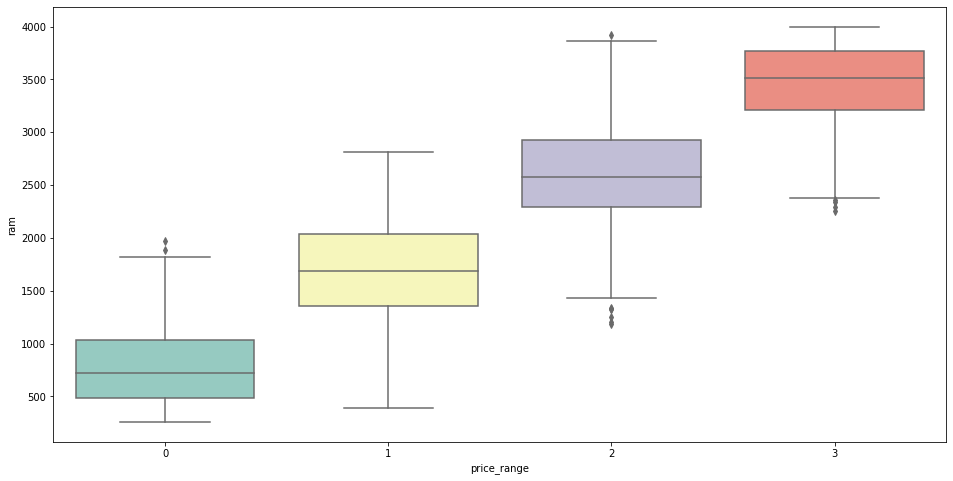

In [9]:
%matplotlib inline
plt.figure(figsize=(16, 8))
sns.boxplot(y="ram", x="price_range",data=train_data, palette="Set3")

- From above plot RAM is coming out to be very important feature in classifying price_range


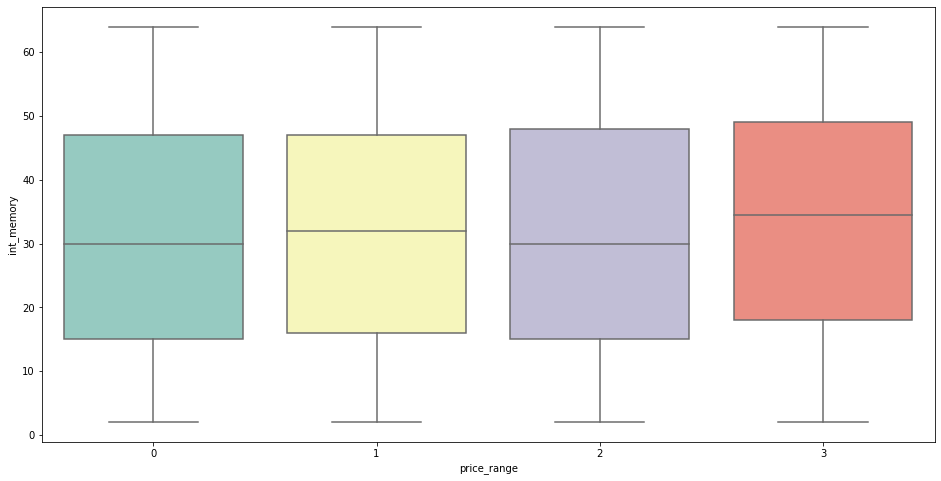

In [17]:
%matplotlib inline
plt.figure(figsize=(16, 8))
sns.boxplot(y="int_memory", x="price_range",data=train_data, palette="Set3")

- From above plot internal memory is not helping classifying price_range as there are overlaps among boxplots

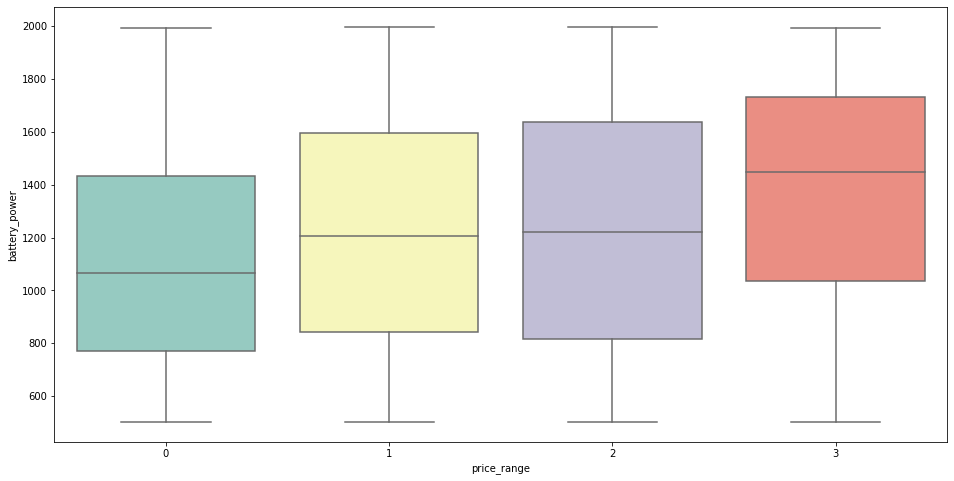

In [18]:
%matplotlib inline
plt.figure(figsize=(16, 8))
sns.boxplot(y="battery_power", x="price_range",data=train_data, palette="Set3")

- As the battery power increases the price of mobiles also increasing but still there is overlap in boxplot

### 5.2 Multivariate data analysis

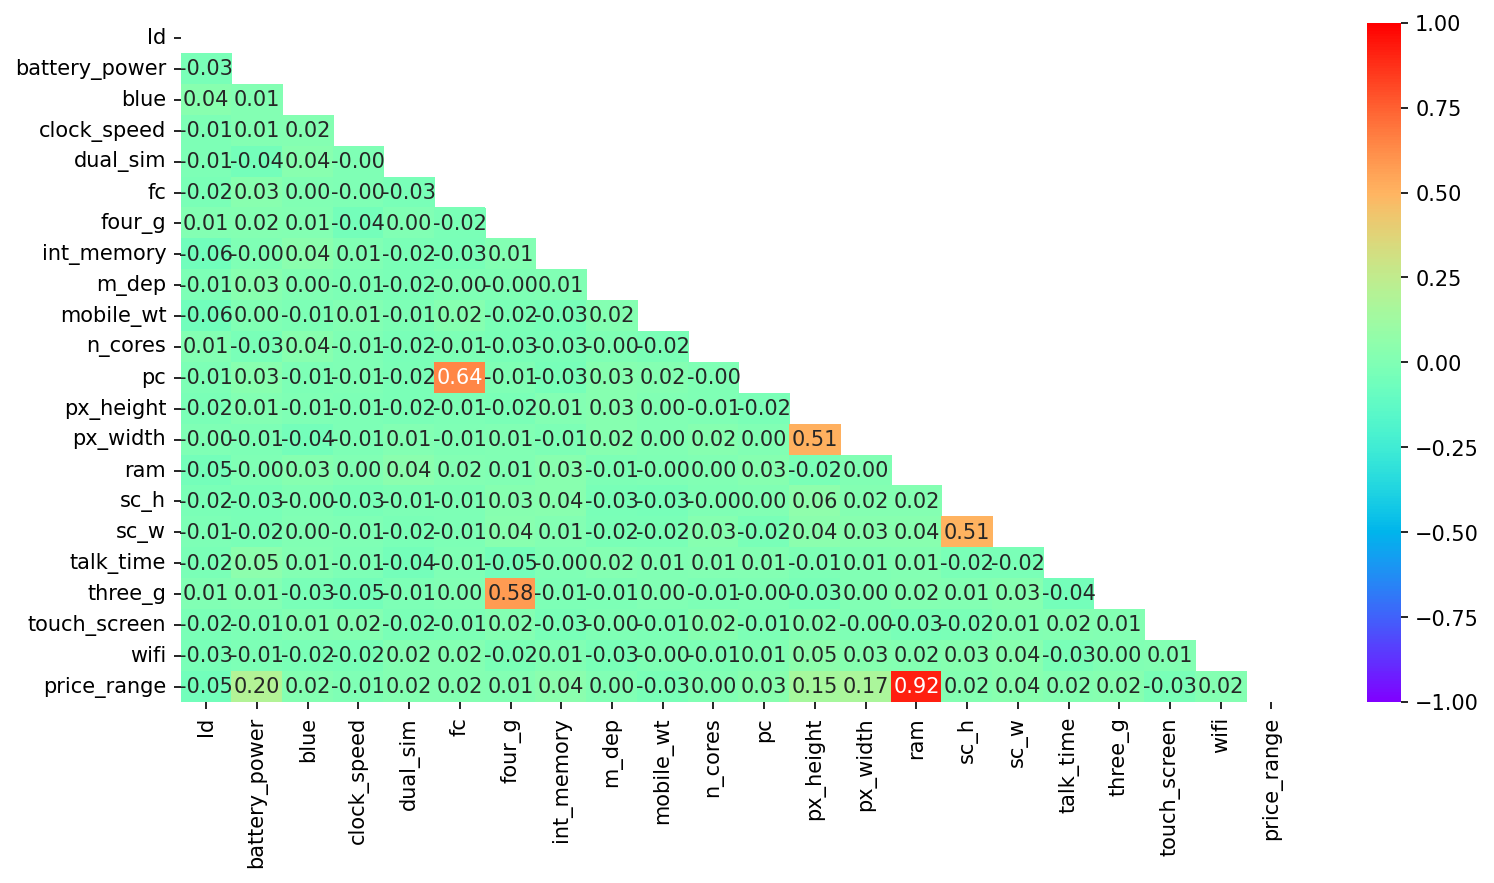

In [19]:
import numpy as np
matrix =np.triu(train_data.corr())
fig,ax =plt.subplots(figsize=(12,6),dpi=150)
sns.heatmap(train_data.corr(),vmax=1,vmin=-1,center=0,annot=True,fmt=".2f",mask=matrix,ax=ax,cmap="rainbow");

- Using heatmeap, ram is reflected to be importat feature for predicting price_range

# 6. Data preparation for Model

In [17]:
X = train_data.drop("price_range",axis=1)
y = train_data.price_range

#splitting of train-val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=43)

#min max scaling our features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# 7. Feature Importance using Random Forest


In [13]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [14]:
rf.feature_importances_

array([3.02411890e-03, 4.95772594e-02, 2.00891249e-04, 1.61663230e-03,
       3.78288180e-04, 1.57874147e-03, 3.37590348e-04, 2.80580357e-03,
       1.72345708e-03, 3.51053343e-03, 1.45048349e-03, 1.85005756e-03,
       2.87760491e-02, 2.63750853e-02, 8.70053688e-01, 2.08126245e-03,
       1.88167416e-03, 2.06944360e-03, 3.39281742e-04, 2.10045743e-04,
       1.59613487e-04])

Text(0.5, 0, 'Random Forest Feature Importance')

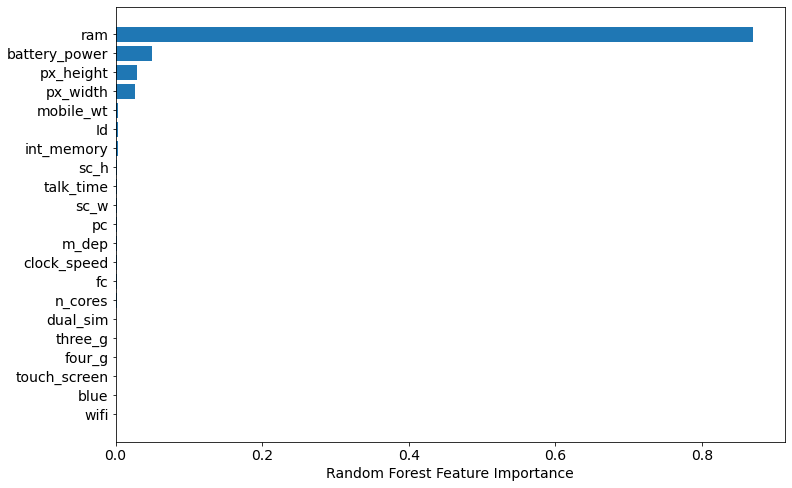

In [15]:
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})
sorted_idx = rf.feature_importances_.argsort()
plt.barh(train_data.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# 8. Model Bulding

### KNN with hyperparameter tuning


In [25]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf =  RandomizedSearchCV(knn_2, hyperparameters, cv=10, n_jobs=-1)
clf.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30, ...],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
      

In [26]:
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=28, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=1,
                     weights='uniform')

In [27]:
Knn = KNeighborsClassifier(algorithm='auto', leaf_size=28, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=1,
                     weights='uniform')
Knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=28, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=1,
                     weights='uniform')

In [28]:
y_pred = Knn.predict(X_val)
y_pred_proba = Knn.predict_proba(X_val)

In [29]:
print("-------Test Scores-------")
y_pred = Knn.predict(X_val)
print()
print(confusion_matrix(y_val, y_pred))
print()
print(classification_report(y_val,y_pred))

print("-------Train Scores-------")
y_pred_train = Knn.predict(X_train)
print()
print(confusion_matrix(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

print(f'Roc Auc Score:{roc_auc_score(y_val,y_pred_proba,multi_class="ovr",average="macro")}')

-------Test Scores-------

[[75 25  4  1]
 [34 38 28  3]
 [ 6 21 50 23]
 [ 0  4 26 62]]

              precision    recall  f1-score   support

           0       0.65      0.71      0.68       105
           1       0.43      0.37      0.40       103
           2       0.46      0.50      0.48       100
           3       0.70      0.67      0.69        92

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400

-------Train Scores-------

[[319  66   9   1]
 [106 225  58   8]
 [ 23  88 230  59]
 [  2  22  77 307]]

              precision    recall  f1-score   support

           0       0.71      0.81      0.76       395
           1       0.56      0.57      0.56       397
           2       0.61      0.57      0.59       400
           3       0.82      0.75      0.78       408

    accuracy                           0.68      1600
   macro avg       0.68      0.68      0.67 

## SVM with hyperparameter tuning

In [ ]:

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']}
 
grid = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)


In [31]:
grid.best_estimator_

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
Svm= SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Svm.fit(X_train,y_train)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [36]:
y_pred = Svm.predict(X_val)
y_pred_proba = Svm.predict_proba(X_val)

In [37]:
print("-------Test Scores-------")
y_pred = Svm.predict(X_val)
print()
print(confusion_matrix(y_val, y_pred))
print()
print(classification_report(y_val,y_pred))

print("-------Train Scores-------")
y_pred_train = Svm.predict(X_train)
print()
print(confusion_matrix(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

print(f'Roc Auc Score:{roc_auc_score(y_val,y_pred_proba,multi_class="ovr",average="macro")}')

-------Test Scores-------

[[105   0   0   0]
 [  3  99   1   0]
 [  0   3  97   0]
 [  0   0   3  89]]

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       105
           1       0.97      0.96      0.97       103
           2       0.96      0.97      0.97       100
           3       1.00      0.97      0.98        92

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.98       400
weighted avg       0.98      0.97      0.97       400

-------Train Scores-------

[[393   2   0   0]
 [  2 389   6   0]
 [  0   2 395   3]
 [  0   0   3 405]]

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       395
           1       0.99      0.98      0.98       397
           2       0.98      0.99      0.98       400
           3       0.99      0.99      0.99       408

    accuracy                           0.99      1600
   macro avg       0.99     

### Random Forest with hyperparameter tuning

In [38]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [39]:
rfc_grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=190,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [40]:
rfc= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
y_pred = rfc.predict(X_val)
y_pred_proba = rfc.predict_proba(X_val)

In [42]:
print("-------Test Scores-------")
y_pred = rfc.predict(X_val)
print()
print(confusion_matrix(y_val, y_pred))
print()
print(classification_report(y_val,y_pred))

print("-------Train Scores-------")
y_pred_train = rfc.predict(X_train)
print()
print(confusion_matrix(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

print(f'Roc Auc Score:{roc_auc_score(y_val,y_pred_proba,multi_class="ovr",average="macro")}')

-------Test Scores-------

[[96  9  0  0]
 [ 5 91  7  0]
 [ 0 14 69 17]
 [ 0  0  8 84]]

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       105
           1       0.80      0.88      0.84       103
           2       0.82      0.69      0.75       100
           3       0.83      0.91      0.87        92

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

-------Train Scores-------

[[395   0   0   0]
 [  0 397   0   0]
 [  0   0 400   0]
 [  0   0   0 408]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       397
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       408

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00 

### LGBM classifier with hyperParameter tuning

In [43]:
from lightgbm import LGBMClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = LGBMClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([5, 6, 7]),
                         'n_estimator

In [44]:
gbdt_grid.best_estimator_

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=140, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [45]:
gbdt = LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=140, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
gbdt.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=140, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [46]:
y_pred = gbdt.predict(X_val)
y_pred_proba = gbdt.predict_proba(X_val)

In [47]:
print("-------Test Scores-------")
y_pred = gbdt.predict(X_val)
print()
print(confusion_matrix(y_val, y_pred))
print()
print(classification_report(y_val,y_pred))

print("-------Train Scores-------")
y_pred_train = gbdt.predict(X_train)
print()
print(confusion_matrix(y_train, y_pred_train))
print()
print(classification_report(y_train, y_pred_train))

print(f'Roc Auc Score:{roc_auc_score(y_val,y_pred_proba,multi_class="ovr",average="macro")}')

-------Test Scores-------

[[98  7  0  0]
 [ 4 97  2  0]
 [ 0  4 90  6]
 [ 0  0  9 83]]

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       105
           1       0.90      0.94      0.92       103
           2       0.89      0.90      0.90       100
           3       0.93      0.90      0.92        92

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400

-------Train Scores-------

[[395   0   0   0]
 [  0 397   0   0]
 [  0   0 400   0]
 [  0   0   0 408]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       395
           1       1.00      1.00      1.00       397
           2       1.00      1.00      1.00       400
           3       1.00      1.00      1.00       408

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00 

# Observation
- with all the three models that we used here, SVM came out to be best with highest value of AUC

# 9. Model Evaluation

- importing original test data set and checking AUC

In [48]:
original_test_data= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Case_studies/Mobile_price/test.csv')

In [49]:
# min-max scaling
original_test_data = scaler.transform(original_test_data)

In [50]:
# calculating AUC metric for original test dta
y_pred_original = Svm.predict(original_test_data)
y_pred__original_proba = Svm.predict_proba(original_test_data)
print(f'Roc Auc Score:{roc_auc_score(y_pred_original ,y_pred__original_proba,multi_class="ovr",average="macro")}')

Roc Auc Score:0.9999973947342369


- Making submission

In [52]:
# making submission
y_sub_df = pd.DataFrame({'Id': test_data['id'], 'price_range': y_pred_original})
y_sub_df.head()

,Id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


In [53]:
y_sub_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Case_studies/Mobile_price/submission.csv', header=False, index= False)

# 10.Conclusion
- SVM came out to be best model in this case with AUC =0.998 and with our test data we had AUC = 99 %
- Using EDA we found out RAM was the most important feature and even with feature selection we found the same.